# Numerična matematika - domača naloga 3
## Matematično nihalo
Gregor Kovač

Simulirati želimo nedušeno nihanje matematičnega nihala, ki je podano z diferencialno enačbo
$\frac{g}{l}\sin{\theta(t)} + \theta''(t) = 0$
z začetnima pogojema $\theta(0)=\theta_0$ in $\theta'(0)=\theta'_0$, kjer je $g=9.80665 \frac{m}{s^2}$ gravitacijski pospešek in $l$ dolžina nihala.

Uvedemo spremenljivki $\theta_1(t) = \theta(t)$ in $\theta_2(t) = \theta'_1(t)$. Od tu dobimo sistem dveh diferencialnih enačb prvega reda:

$\theta'_1(t) = \theta_2(t)$

$\theta'_2(t) = -\frac{g}{l}\sin(\theta_1(t))$.

Ta sistem rešujemo z metodo Runge-Kutta reda 4.

## Osnovna simulacija

In [1]:
import numpy as np
from nihalo import *
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=16)

Simulirajmo nihanje in izrišimo nihalo ter spremembo kota skozi čas.

*Opomba:* na sliki, ki simulira nihalo, prosojnost predstavlja točko v času. Bolj kot je nihalo prosojno, bliže je $t=0$.

In [2]:
# Simuliramo nihanje s spodnjimi parametri
l = 1
t = 2
theta0 = np.pi / 2
dtheta0 = 0.1
n = 30

theta, dtheta = nihalo(l = l, t = t, theta0 = theta0, dtheta0 = dtheta0, n = n, return_trace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


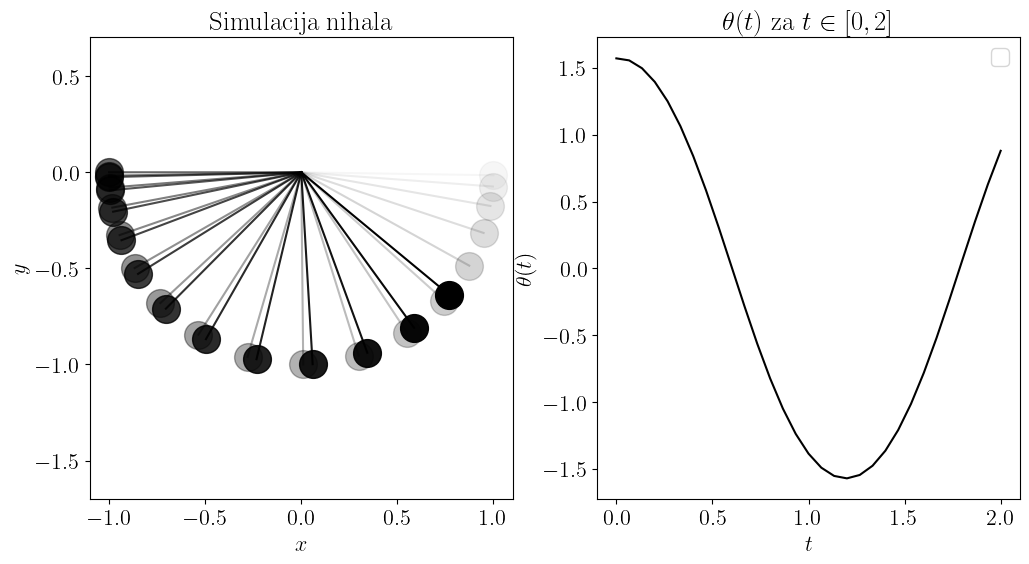

In [3]:
x = np.cos(theta)
y = np.sin(theta)
colors = np.linspace(0, 1, len(x))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Subplot 1
for i in range(len(x)):
    plt.plot([0, y[i]], [0, -x[i]], color=(0, 0, 0, colors[i]))
    plt.plot(y[i], -x[i], 'o', color=(0, 0, 0, colors[i]), markersize=20)

plt.title('Simulacija nihala')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis('equal')

# Subplot 2
plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, t, len(theta)), theta, color='black')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta(t)$')
plt.title(rf'$\theta(t)$ za $t \in [0, {t}]$')


plt.legend()

## Primerjava nihal z različnimi začetnimi pogoji

Primerjajmo 4 nihala z enako začetno kotno hitrostjo $\theta'_0 = 0$ in različnimi začetnimi legami.

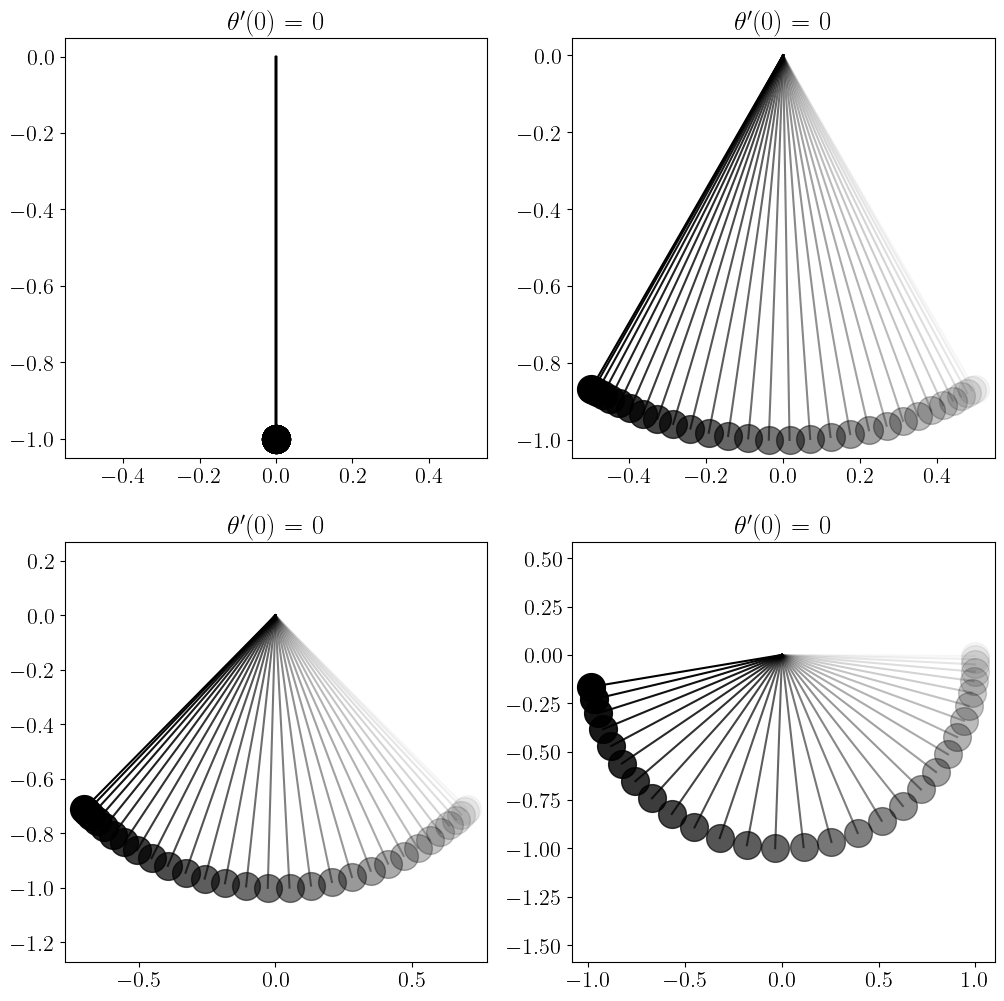

In [4]:
l = 1
t = 1
dtheta0 = 0
n = 30

plt.figure(figsize=(12, 12))

i = 1
for theta0 in [0, np.pi/6, np.pi/4, np.pi/2]:
    theta, dtheta = nihalo(l = l, t = t, theta0 = theta0, dtheta0 = dtheta0, n = n, return_trace=True)

    plt.subplot(2, 2, i)
    plt.title(rf"$\theta'(0)$ = {dtheta0}")
    i += 1

    x = np.cos(theta)
    y = np.sin(theta)
    colors = np.linspace(0, 1, len(x))

    for j in range(len(x)):
        c = (0, 0, 0, colors[j])

        plt.plot([0, y[j]], [0, -x[j]], color=c)
        plt.plot(y[j], -x[j], 'o', color=c, markersize=20)
    
    plt.axis('equal')

Kot pričakovano se nihalo z večjim začetnim kotom zaziba dlje.

Simulirajmo še 4 različna nihala, ki vsa začnejo v najnižji legi ($\theta_0 = 0$), a imajo različne količine začetne kotne hitrosti.

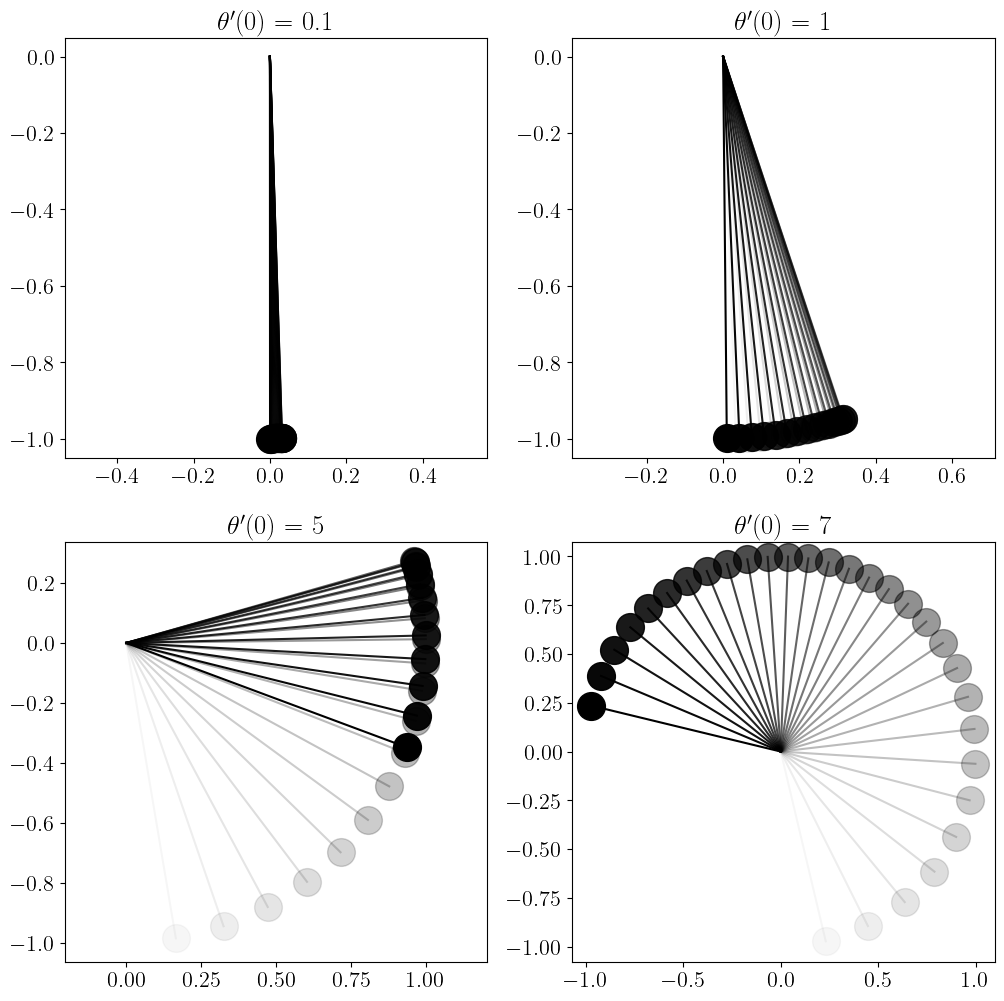

In [5]:
l = 1
t = 1
theta0 = 0
n = 30

plt.figure(figsize=(12, 12))

i = 1
for dtheta0 in [0.1, 1, 5, 7]:
    theta, dtheta = nihalo(l = l, t = t, theta0 = theta0, dtheta0 = dtheta0, n = n, return_trace=True)

    plt.subplot(2, 2, i)
    plt.title(rf"$\theta'(0)$ = {dtheta0}")
    i += 1

    x = np.cos(theta)
    y = np.sin(theta)
    colors = np.linspace(0, 1, len(x))

    for j in range(len(x)):
        c = (0, 0, 0, colors[j])

        plt.plot([0, y[j]], [0, -x[j]], color=c)
        plt.plot(y[j], -x[j], 'o', color=c, markersize=20)
    
    plt.axis('equal')

Večja kot je začetna kotna hitrost, višje gre nihalo, kar smo pričakovali. V prvem primeru se skoraj ne premakne, v zadnjem pa naredi skoraj cel krog.

## Nihajni čas

In [11]:
def nihajni_cas(l, theta0, dtheta0, dt, eps = 0.1):
    t = 0
    theta = theta0
    dtheta = dtheta0
    warmup = True
    iter = 0
    while True:
        iter += 1
        t = t + dt
        thetaa, dthetaa = nihalo(l = l, t = t, theta0 = theta, dtheta0 = dtheta, n = 10, return_trace=True)
        theta = thetaa[-1]
        dtheta = dthetaa[-1]
        if abs(theta) < eps:
            warmup = False
        if abs(theta - theta0) < eps and not warmup:
            return t
        
        if iter > 1000:
            return None

Text(0, 0.5, '$t$')

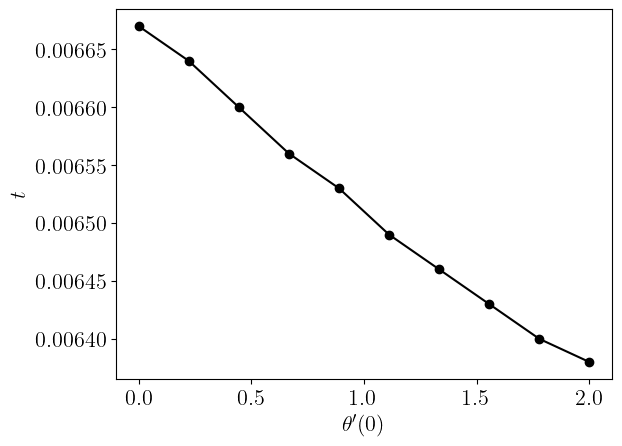

In [12]:
nihajni_casi = []

for dtheta0 in np.linspace(0, 2, 10):
    nt = nihajni_cas(1, -np.pi/2, dtheta0, 0.00001, 0.1)
    if nt is not None:
        nihajni_casi.append((dtheta0, nt))

plt.plot(*zip(*nihajni_casi), 'o-', color='black')
plt.xlabel(r"$\theta'(0)$")
plt.ylabel(r'$t$')